# Análisis de agrupamento

Es una técnica de aprendizaje de máquina no supervisado que consiste en formar grupos segun las características de las observaciones.

## Casos de uso

- **Segmentación de clientes:** agrupar clientes de una base de datos segun sus características para poder direccionar mejor las campañas de marketing.
- **Investigación de mercado:** Estamos interesados en hacer un estudio de mercado en diversos distritos de Lima, sin embargo, el presupuesto para el estudio de mercado es bajo. Una forma de realizar el estudio es, agrupar los distritos por sus caracteristicas y selecionar algunos distritos dentro de cada grupo de forma aleatoria.
- **Educación:** los profesores de una institución pueden ser evaluados por los alumnos y, de acuerdo con determinadas características, ser agrupados. Con los grupos definidos podemos trazar un perfil del docente para, posteriormente, analisar la relación del perfil con otras variables no consideradas en la evaluación de los alunos (tipo de institución donde el docente estudio, años de experiencia, participación en capacitaciones, etc).


## Objetivo

- Dividir los elementos de la muestra (o población) en grupos, de forma que, los elementos pertenecientes al mismo grupo sean similares entre si y, al mismo tiempo, que los elementos entre grupos sean heterogeneos entre si.


## Técnicas de agrupamiento

- Jerárquicas
- No Jerárquicas


Técnicas jerarquicas son, generalmente, utilizadas en análisis exploratorias con el objetivo de identificar posibles agrupamientos y el número de grupos.

Técnicas no jerárquicas necesitan que el número de grupos ya esté establecido.


### Técnicas Jerárquicas

- Aglomerativas
- Divisivas

Las técnicas aglomerativas parten del principio de que al início del proceso de agrupamiento cada observacion es un cluster (comenzamos con n clusters). En cada paso del algoritmo, los elementos van se uniendo, esto es realizado hasta tener un unico grupo. **En técnicas aglomerativas, al início del proceso tenemos $n$ clusters de tamaño 1 y al final del proceso tenemos 1 cluster de tamaño $n$.**


Las técnicas divisivas parten del principio de que al início del proceso de agrupamiento tenemos un único cluster (con todas las observaciones). En cada paso del algoritmo, los elemento van se separando, esto es realizado hasta tener $n$ grupos. **En técnicas divisivas, al início del proceso tenemos 1 cluster de tamaño $n$ y al final del proceso tenemos $n$ clusters de tamaño 1.**


Aglomerativo:
- Comenzamos con $n$ clusters de tamaño 1.
Divisivo:
- Comenzamos con 1 cluster de tamaño $n$.

Aglomerativo:
- Terminamos con un cluster de tamaño $n$.
Divisivo:
- Terminamos con $n$ clusters de tamaño 1.


### Técnicas aglomerativas (idea del algoritmo)

1. Cada elemento es un cluster de tamaño 1
2. Calcular, por pares de cluster, los cluster que son mas similares. Estos dos clusters mas similares se unen y forman un único cluster (ahora tenemos $n-1$ clusters).
3. Repetir el paso 2, hasta tener un único cluster de tamaño $n$.

**Observación:** cada nuevo cluster formado es un agrupamiento de los clusters formados en los pasos anteriores. Esto quiere decir que, si dos elementos se unen en un cluster, estos elementos continuarán en el mismo cluster siempre. Esta propiedad nos permite crear un _dendograma_ (que es una representación gráfica de la "história" del agrupamiento)

In [2]:
# Ejemplo 1
#library(dplyr)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
datos = read.table(url)
nombres = c('area','perimeter','compactness','length.of.kernel','width.of.kernal','asymmetry.coefficient','length.of.kernel.groove','type.of.seed')
colnames(datos) <- nombres
glimpse(datos)

Rows: 210
Columns: 8
$ area                    <dbl> 15.26, 14.88, 14.29, 13.84, 16.14, 14.38, 14.6…
$ perimeter               <dbl> 14.84, 14.57, 14.09, 13.94, 14.99, 14.21, 14.4…
$ compactness             <dbl> 0.8710, 0.8811, 0.9050, 0.8955, 0.9034, 0.8951…
$ length.of.kernel        <dbl> 5.763, 5.554, 5.291, 5.324, 5.658, 5.386, 5.56…
$ width.of.kernal         <dbl> 3.312, 3.333, 3.337, 3.379, 3.562, 3.312, 3.25…
$ asymmetry.coefficient   <dbl> 2.2210, 1.0180, 2.6990, 2.2590, 1.3550, 2.4620…
$ length.of.kernel.groove <dbl> 5.220, 4.956, 4.825, 4.805, 5.175, 4.956, 5.21…
$ type.of.seed            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


In [8]:
datos = datos[,-8]
datos = scale(datos)

In [9]:
dist_mat <- dist(datos, method = 'euclidean')

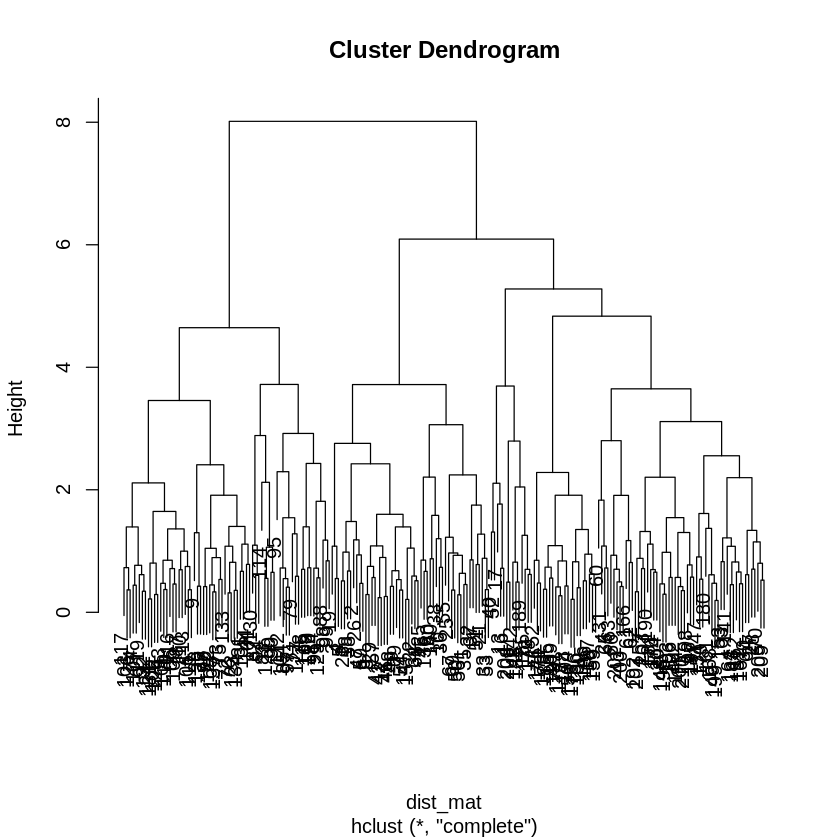

In [20]:
hclust_avg <- hclust(dist_mat)
plot(hclust_avg)

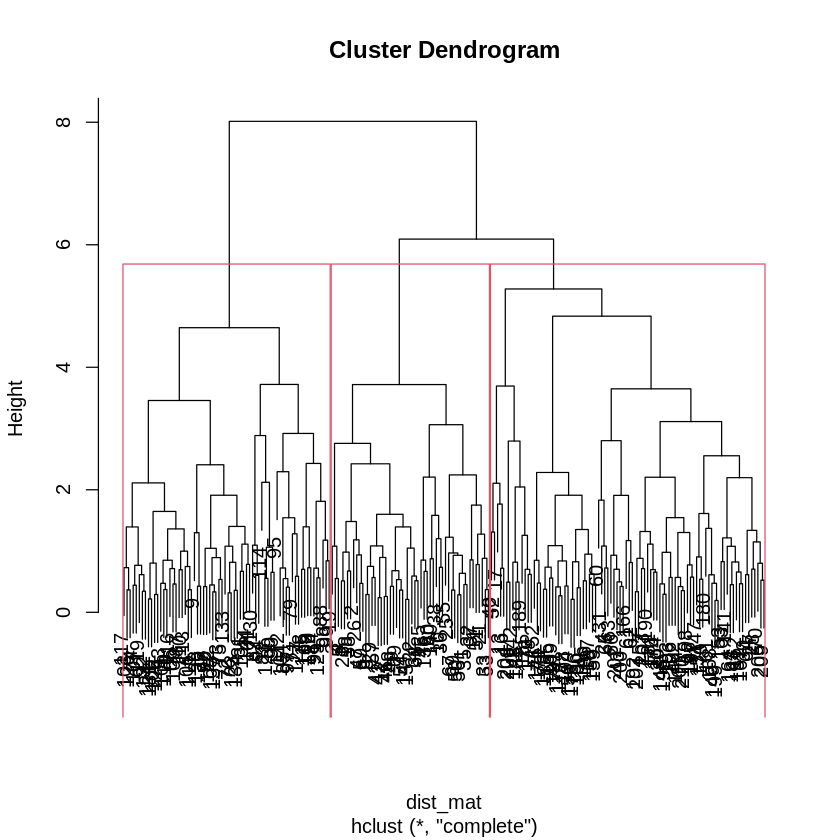

In [51]:
plot(hclust_avg)
rect.hclust(hclust_avg , k = 3)

## Medidas de similaridad y disimilaridad

Para decidir que tan próximas son las observaciones unas de las otras, necesitamos de alguma medida de similaridad o disimilaridad.


Sean $x_1, x_2, \cdots, x_n, \in \mathbb{R}^p$, $n$ observaciones p-dimensionales. 

### Distancia Euclideana

Si consideramos las observaciones $x_i$ y $x_j$, la distancia euclidena entre estas observaciones es dada por: $$D_{ij} = \sqrt{\displaystyle \sum_{p = 1}^{k} (x_{ip}-x_{jp})^2}$$


Por ejemplo, si $x_1 = (16, 14)$ y $x_2 = (12, 13)$, la distancia euclidena entre $x_1$ y $x_2$ es: 

$$D_{ij} = \sqrt{(16-12)^2 + (14-13)^2} = \sqrt{4^2 + 1} = \sqrt{17}$$

Por ejemplo, si $x_1 = (16, 14, 8)$ y $x_2 = (12, 13, 10)$, la distancia euclidena entre $x_1$ y $x_2$ es: 

$$D_{ij} = \sqrt{(16-12)^2 + (14-13)^2 + (8-10)^2} = \sqrt{4^2 + 1 + 4} = \sqrt{21}$$


### Distancia Euclideana al cuadrado

$$D_{ij} = \displaystyle \sum_{p = 1}^{k} (x_{ip}-x_{jp})^2$$


### Distancia de Minkowski
$$D_{ij} = \Big[\displaystyle \sum_{p = 1}^k |x_{ip}- x_{jp}|^2 \Big]^{1/n}$$

- Para $n = 2$ tenemos la distancia Euclideana.
- Para $n = 1$ tenemos la distancia de Manhattan.


Ejemplo extremo:

$x_1 = (20, 10)$ y $x_2 = (20, 10)$.

$$D_{12} = \sqrt{(20-20)^2 + (10-10)^2} = 0$$

 $x_3 = c(10, 0)$


$$D_{13} = \sqrt{(20-10)^2 + (10-0)^2} = \sqrt{10^2 + 10^2} = \sqrt{200}$$






## Estandarizar o no estandarizar? esa es la cuestión...

![Estandarizar o no estandarizar? esa es la cuestión](https://i.pinimg.com/originals/79/bc/3c/79bc3c39a5c0850598e8ebaa4765dc03.jpg)


Las distancias vistas anteriormente estan basadas apenas en la sustracción, esto significa que variables con mayor variabilidad tendran un efecto mayor (simplemente devido a la escala, por ejemplo). Para evitar esto podemos estandarizar las variables.

- **Similaridad**: cuanto mayor el valor observado, mas parecidos (semejantes) son las observaciones. Ejemplo: coeficiente de correlación.
- **Disimilaridad**: cuanto mayor el valor observados, menos parecidas son las observaciones (cuanto menor el valor observado, mas parecidas son las obseraciones). Ejemplo: Distancia euclideana, euclideana al cuadrado, Minkowski.


## Como funciona el agrupamiento?

- En la etapa inicial, es fácil pues unimos los elementos que sean mas parecidos entre si.
- Como unir clusters? 



In [46]:
?hclust

## Selección del número de clusters

- Dendograma
- Silhouette plot, 
- Elbow plot, 
- Dunn's index, 
- Hubert's gamma, 
- **Gap** index.





In [47]:
fun_clus_num <- function(x,k) list(cluster = stats::cutree(hclust(stats::as.dist(x) , method = "centroid", members = NULL), k))

In [48]:
gap <- cluster::clusGap(as.matrix(dist_mat), FUN = fun_clus_num, K.max = floor(nrow(datos)/4), B = 100)
n_clusters <- cluster::maxSE(gap$Tab[,"gap"], gap$Tab[,"SE.sim"], method = "Tibs2001SEmax")
n_clusters <- max(2, n_clusters)
n_clusters

[1] 2

Existen diversos métodos para determinar el número optimo de cluster que aun están siendo desarrollados, entre ellos:  [aqui](https://link.springer.com/article/10.1007/s41019-019-0091-y) y [aqui](https://stat.ethz.ch/R-manual/R-devel/library/cluster/html/clusGap.html). Una revisón de diversos métodos de agrupamiento puede ser encontrada [aqui](https://www.sciencedirect.com/science/article/abs/pii/S095219762200046X?casa_token=5Z_8wKeZW1sAAAAA:4z8MsuTrw6UCNKjaUSxAtil5nXv6e14Ds678HqrIG_4EeDmmIBTJa-Uef2Bv2zc1E3_B00fFJjUO).

## Técnicas no Jerárquicas: K-means

- Conocemos a priori el número de grupos a formar.
- Las observaciones son asignadas a los grupos de tal forma que se maximiza la homogeneidad de las observaciones asignadas al mismo grupo y la heterogeneidad entre los distintos grupos.
- Puede ocurrir que, dos elementos unidos en algun grupo en algun paso, no permanescan en el mismo grupo al final del proceso.

### Como funciona el algoritmo?

1. Definimos los centroides iniciales de los $k$ grupos (**Como?**)
2. Cada elemento del conjunto de datos es comparado con cada centroide inicial atraves de una medida de distancia (euclideana, por ejemplo).
3. Recalculamos los valores de los centroides y repetimos el paso 3, considerando los nuevos centroides 

In [28]:
cl = kmeans(datos, 2)
cl

K-means clustering with 2 clusters of sizes 133, 77

Cluster means:
        area perimeter compactness length.of.kernel width.of.kernal
1 -0.6588042 -0.662982  -0.3140631       -0.6519023      -0.6160407
2  1.1379346  1.145151   0.5424726        1.1260130       1.0640703
  asymmetry.coefficient length.of.kernel.groove
1            0.08462825              -0.6639828
2           -0.14617607               1.1468793

Clustering vector:
  [1] 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2
 [38] 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 459.7972 196.2357
 (between_SS / total_SS =  55.2 %)

Availab

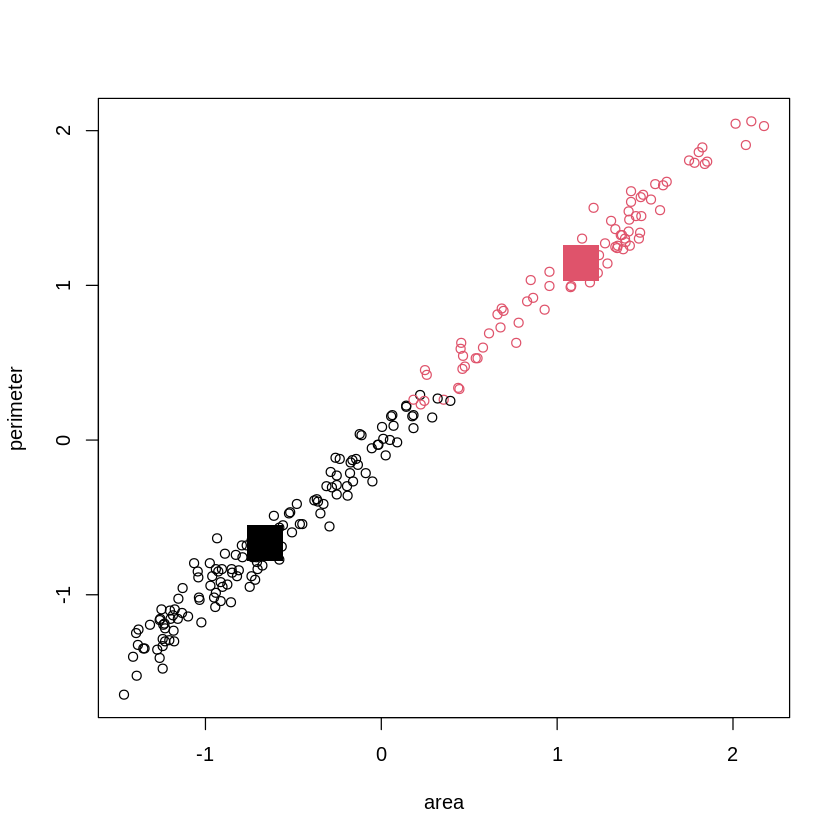

In [36]:
plot(datos, col = cl$cluster)
points(cl$centers, col = 1:2, pch = 15, cex = 4)